# Regresión lineal

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm # LIBRERIA PARA UTILIZAR REGRESION LINEAL

In [2]:
!wget -O regresion.xlsx https://github.com/jordipereiragude/dataforcourses/raw/refs/heads/main/regresion-conDias.xlsx

--2025-02-27 17:35:55--  https://github.com/jordipereiragude/dataforcourses/raw/refs/heads/main/regresion-conDias.xlsx
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jordipereiragude/dataforcourses/refs/heads/main/regresion-conDias.xlsx [following]
--2025-02-27 17:35:55--  https://raw.githubusercontent.com/jordipereiragude/dataforcourses/refs/heads/main/regresion-conDias.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16169 (16K) [application/octet-stream]
Saving to: ‘regresion.xlsx’

regresion.xlsx      100%[===================>]  15.79K  --.-KB/s    in 0s      

2025-02-27 17:35:55 (44.6

In [3]:
# Leemos archivo con datos
df = pd.read_excel('regresion.xlsx')
# visualizamos la serie
print(df.head())

         día  temperatura  ventas
0      lunes          8.6      76
1     martes          6.1      73
2  miércoles          8.4      89
3     jueves          7.2      62
4    viernes          7.4      97


In [4]:
print(df.head(25)) # TRANSFORMAR ESTO A VARIABLES BINARIAS.

          día  temperatura  ventas
0       lunes          8.6      76
1      martes          6.1      73
2   miércoles          8.4      89
3      jueves          7.2      62
4     viernes          7.4      97
5      sábado          5.1     121
6     domingo          3.0      62
7       lunes          2.4      60
8      martes          1.3      23
9   miércoles          0.6      15
10     jueves          3.4      27
11    viernes          3.2      70
12     sábado          7.8      85
13    domingo         10.6     113
14      lunes         10.6     109
15     martes         10.8     104
16  miércoles          9.9     123
17     jueves          8.2      76
18    viernes          8.2     114
19     sábado          9.4     150
20    domingo          9.2     125
21      lunes          8.8     100
22     martes          7.6     103
23  miércoles          9.2     120
24     jueves          6.0      84


VENTAS DIA CONCRETO = TEMPERATURA DIA CONCRETO + EFECTO ASOCIADO AL DIA + E

# Gráficos de la serie

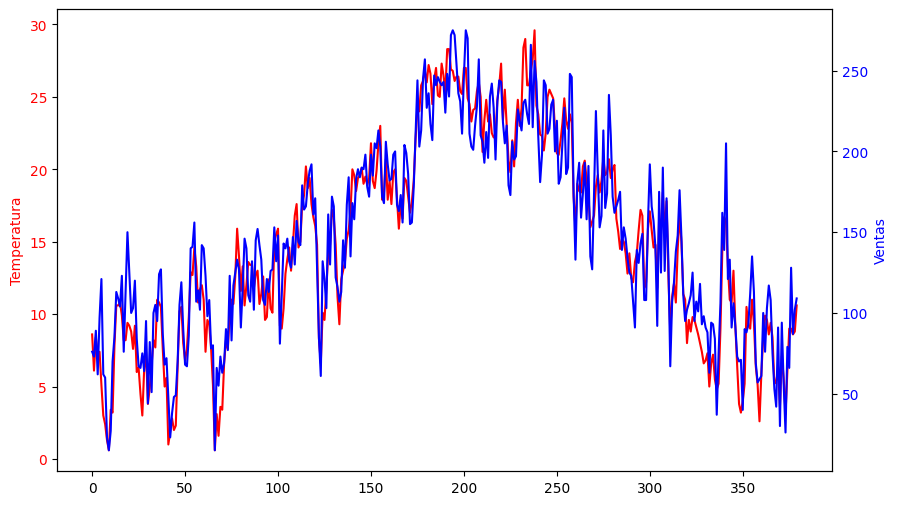

In [ ]:
#vamos a crear dos gráficos juntos (temperatura y ventas)
fig, ax1 = plt.subplots(figsize=(10, 6))

#temperatura
ax1.set_ylabel('Temperatura', color='red')
ax1.plot(df['temperatura'], color='red', label='Temperatura')
ax1.tick_params(axis='y', labelcolor='red')

# ventas
ax2 = ax1.twinx()
ax2.set_ylabel('Ventas', color='blue')
ax2.plot(df['ventas'], color='blue', label='Ventas')
ax2.tick_params(axis='y', labelcolor='blue')

**Red Line (Left Y-Axis)**: This represents the "Temperatura" (Temperature) data. The left y-axis shows the scale for temperature.

**Blue Line (Right Y-Axis)**: This represents the "Ventas" (Sales) data. The right y-axis shows the scale for sales.
Key Observations from the Image:

**Correlation**: There appears to be a positive correlation between temperature and sales. When temperature is higher, sales tend to be higher as well.

**Seasonal Pattern**: Both temperature and sales seem to exhibit a seasonal pattern. There's a peak around the middle of the x-axis (likely representing warmer months or a specific period), and lower values on the edges.

**Dual Y-Axis**: The use of dual y-axes allows for easy comparison of two datasets with different scales.

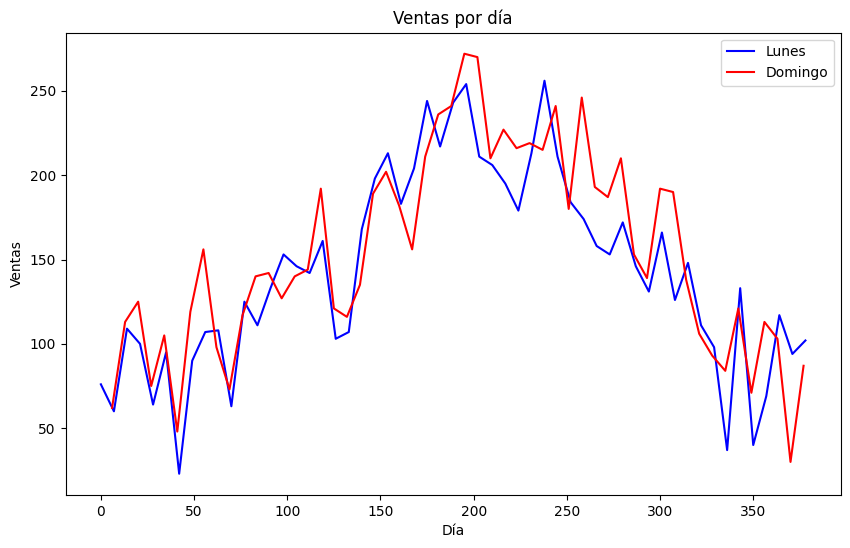

In [ ]:
#Analicemos la diferencia entre los lunes y los domingos

dfLunes = df[df['día']=="lunes"]
dfDomingo = df[df['día']=="domingo"]

plt.figure(figsize=(10, 6))  # Optional: Specifies the figure size
plt.plot(dfLunes['ventas'], color='blue',label="Lunes")
plt.plot(dfDomingo['ventas'], color='red',label="Domingo")
# Add title and axis names
plt.title('Ventas por día')
plt.xlabel('Día')
plt.ylabel('Ventas')
plt.legend()
plt.show()



# Primera regresión

In [5]:
# Para hacer una regresión, hay que transformar los datos en datos numéricos (los días)
df_dummies = pd.get_dummies(df['día'])
print(df_dummies)

     domingo  jueves  lunes  martes  miércoles  sábado  viernes
0      False   False   True   False      False   False    False
1      False   False  False    True      False   False    False
2      False   False  False   False       True   False    False
3      False    True  False   False      False   False    False
4      False   False  False   False      False   False     True
..       ...     ...    ...     ...        ...     ...      ...
375    False   False  False   False      False   False     True
376    False   False  False   False      False    True    False
377     True   False  False   False      False   False    False
378    False   False   True   False      False   False    False
379    False   False  False    True      False   False    False

[380 rows x 7 columns]


In [8]:
# Consideraremos el lunes como día "base"
df_dummies = df_dummies.drop(columns=['lunes']) # ELIMINATES MONDAY
print(df_dummies)

     domingo  jueves  martes  miércoles  sábado  viernes
0      False   False   False      False   False    False
1      False   False    True      False   False    False
2      False   False   False       True   False    False
3      False    True   False      False   False    False
4      False   False   False      False   False     True
..       ...     ...     ...        ...     ...      ...
375    False   False   False      False   False     True
376    False   False   False      False    True    False
377     True   False   False      False   False    False
378    False   False   False      False   False    False
379    False   False    True      False   False    False

[380 rows x 6 columns]


In [9]:
# Creamos el dataframe como un bloque
df = pd.concat([df, df_dummies], axis=1)
print(df.head().to_markdown())

|    | día       |   temperatura |   ventas | domingo   | jueves   | lunes   | martes   | miércoles   | sábado   | viernes   | domingo   | jueves   | lunes   | martes   | miércoles   | sábado   | viernes   | domingo   | jueves   | martes   | miércoles   | sábado   | viernes   |
|---:|:----------|--------------:|---------:|:----------|:---------|:--------|:---------|:------------|:---------|:----------|:----------|:---------|:--------|:---------|:------------|:---------|:----------|:----------|:---------|:---------|:------------|:---------|:----------|
|  0 | lunes     |           8.6 |       76 | False     | False    | True    | False    | False       | False    | False     | False     | False    | True    | False    | False       | False    | False     | False     | False    | False    | False       | False    | False     |
|  1 | martes    |           6.1 |       73 | False     | False    | False   | True     | False       | False    | False     | False     | False    | False   | Tru

In [ ]:
# Para hacer una regresión, hay que transformar los datos en datos numéricos (los días)
df_dummies = pd.get_dummies(df['día'])
# Consideraremos el lunes como día "base"
df_dummies = df_dummies.drop(columns=['lunes']) # ELIMINATES MONDAY
# Creamos el dataframe como un bloque
df = pd.concat([df, df_dummies], axis=1)
print(df.head())



         día  temperatura  ventas  domingo  jueves  martes  miércoles  sábado  \
0      lunes          8.6      76    False   False   False      False   False   
1     martes          6.1      73    False   False    True      False   False   
2  miércoles          8.4      89    False   False   False       True   False   
3     jueves          7.2      62    False    True   False      False   False   
4    viernes          7.4      97    False   False   False      False   False   

   viernes  
0    False  
1    False  
2    False  
3    False  
4     True  


In [ ]:
# X son las variables que vamos a usar para pronosticar las ventas
X = df.drop(columns=['día', 'ventas'])
print(X.dtypes)
X['martes'] = X['martes'].astype(int)
X['miércoles'] = X['miércoles'].astype(int)
X['jueves'] = X['jueves'].astype(int)
X['viernes'] = X['viernes'].astype(int)
X['sábado'] = X['sábado'].astype(int)
X['domingo'] = X['domingo'].astype(int)

X = sm.add_constant(X)  # Añadimos un factor fijo
# y es la variable que queremos pronosticar
y = df['ventas']

# Vamos a resolver el modelo
model = sm.OLS(y, X).fit()

# Imprimir un resumen de resultados
print(model.summary())

temperatura    float64
domingo           bool
jueves            bool
martes            bool
miércoles         bool
sábado            bool
viernes           bool
dtype: object
                            OLS Regression Results                            
Dep. Variable:                 ventas   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     656.0
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          5.96e-205
Time:                        23:45:52   Log-Likelihood:                -1598.9
No. Observations:                 380   AIC:                             3214.
Df Residuals:                     372   BIC:                             3245.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err  

Preparing Predictor Variables (X):

`X = df.drop(columns=['día', 'ventas'])`: This creates a new DataFrame X containing all columns from df except 'día' (day) and 'ventas' (sales). The 'ventas' column is excluded because it's what we want to predict, and 'día' is likely not a useful numerical variable for a linear regression model.

`print(X.dtypes)`: This prints the data types of each column in X. It's important to verify that the predictors are numerical or convertible to numerical.

`Integer Conversion`: The following lines convert columns representing days of the week (martes, miércoles, etc. - Tuesday, Wednesday, etc.) to integers. This is necessary because some linear regression implementations require categorical variables (like days of the week) to be encoded as numbers.

`X = sm.add_constant(X)`: This adds a column of ones to X. This column represents the constant term (or intercept) in the linear regression model. The constant term is the expected value of y when all predictors are zero.

Preparing the Target Variable (y):

`y = df['ventas']`: This creates a Series y containing the 'ventas' (sales) column from df. This is the variable we want to predict.
Building and Training the Model:

`model = sm.OLS(y, X).fit()`: This creates and trains an ordinary least squares (OLS) linear regression model using the statsmodels library (imported as sm).

`sm.OLS(y, X)`: Creates an OLS model object with y as the target and X as the predictors.

`.fit()`: Fits the model to the data, i.e., finds the coefficients that best fit the relationship between X and y.


SUMMARY:

*I. Model Information:*
- `Dep. Variable`: ventas: This confirms that 'ventas' is the dependent variable (the variable being predicted).
- `Model`: OLS: Indicates that the model is an Ordinary Least Squares linear regression.
- `Method`: Least Squares: Specifies the method used to estimate the model's coefficients (minimizing the sum of squared errors).
- `Date & Time`: Shows when the model was run.
- `No. Observations: 380`: The number of data points used to train the model.

- `Df Residuals: 372`: Degrees of freedom of the residuals (number of observations minus number of parameters estimated).
- `Df Model: 7`: Degrees of freedom of the model (number of predictors).
- `Covariance Type`: nonrobust: Indicates that the standard errors are calculated under the assumption of homoscedasticity (constant variance of errors).

*II. Model Fit Statistics:*

- `R-squared`: 0.925: This is the coefficient of determination. It indicates that 92.5% of the variance in 'ventas' is explained by the model. A high R-squared suggests a good fit.
- Adj. R-squared: 0.924`: Adjusted R-squared penalizes the inclusion of unnecessary predictors. It's close to R-squared, suggesting the model isn't overfitted.
- `F-statistic: 656.0`: Tests the overall significance of the model. A high F-statistic with a low p-value indicates that the model is statistically significant.
- `Prob (F-statistic): 5.96e-205`: The p-value associated with the F-statistic. It's extremely small (close to zero), indicating strong evidence that the model is statistically significant.
- `Log-Likelihood: -1598.9`: A measure of how well the model fits the data. Used in comparing different models.
- `AIC: 3214.`: Akaike Information Criterion. Used for model selection, lower is better.
- `BIC: 3245.`: Bayesian Information Criterion. Another model selection criterion, lower is better.

*III. Coefficient Table:*

- `coef`: The estimated coefficients for each predictor.
- `std err`: The standard error of the coefficients.
- `t`: The t-statistic, used to test the significance of each coefficient.
- `P>|t|`: The p-value associated with the t-statistic. A p-value less than 0.05 is generally considered statistically significant.
- `[0.025 0.975]`: The 95% confidence interval for each coefficient.

*IV. Interpreting the Coefficients:*

- `const (Intercept): 24.6761`: The predicted 'ventas' when all predictors are zero.
- `temperatura: 7.9705`: For each one-unit increase in 'temperatura', 'ventas' is expected to increase by 7.97 units, holding other variables constant. This is highly significant (p < 0.001).
- `domingo: 11.2362`: 'ventas' is expected to be 11.23 units higher on Sundays, holding other variables constant. This is significant.
- `jueves: -4.3961`: 'ventas' is expected to be 4.39 units lower on Thursdays, holding other variables constant. This is not statistically significant (p > 0.05).
- `martes: -1.5564`: 'ventas' is expected to be 1.55 units lower on Tuesdays, holding other variables constant. This is not statistically significant (p > 0.05).
- `miércoles: -0.9282`: 'ventas' is expected to be 0.92 units lower on Wednesdays, holding other variables constant. This is not statistically significant (p > 0.05).
- `sábado: 15.3434`: 'ventas' is expected to be 15.34 units higher on Saturdays, holding other variables constant. This is significant.
- `viernes: 2.6538`: 'ventas' is expected to be 2.65 units higher on Fridays, holding other variables constant. This is not statistically significant (p > 0.05).

*IV. Residual Diagnostics:*

- `Omnibus & Prob(Omnibus)`: Tests the normality of the residuals. A non-significant p-value (like 0.218) suggests residuals are normally distributed.
- `Skew & Kurtosis`: Measures of the asymmetry and peakedness of the residuals.
- `Durbin-Watson: 1.940`: Tests for autocorrelation in the residuals. A value close to 2 indicates no significant autocorrelation.
- `Jarque-Bera (JB) & Prob(JB)`: Another test for normality of residuals.
- `Cond. No.: 122.`: Condition number, a measure of multicollinearity. A value above 30 suggests potential multicollinearity (but this is not very high).

# Regresión alternativa

In [ ]:
import statsmodels.formula.api as smf

df = pd.read_excel('regresion.xlsx')
df['finDeSemana'] = df['día'].apply(lambda x: 1 if x in ['sábado', 'domingo'] else 0)
print(df.dtypes)
model = smf.ols(formula='ventas ~ temperatura + finDeSemana', data=df).fit()
print(model.summary())

día             object
temperatura    float64
ventas           int64
finDeSemana      int64
dtype: object
                            OLS Regression Results                            
Dep. Variable:                 ventas   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     2281.
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          2.45e-211
Time:                        23:45:52   Log-Likelihood:                -1602.3
No. Observations:                 380   AIC:                             3211.
Df Residuals:                     377   BIC:                             3223.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------